ASL RECOGNATION KERBOUTE AMINE ETAPE 1

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

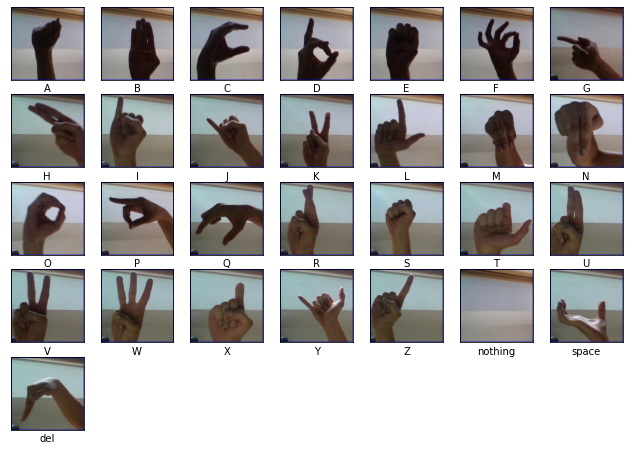

In [ ]:
train_dir = 'C:/Users/amine/OneDrive/Bureau/project/asl_alphabet_train/asl_alphabet_train'
test_dir = 'C:/Users/amine/OneDrive/Bureau/project//asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [ ]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
Loading: 164.68125438690186


In [ ]:
classes = 29
batch = 128
epochs = 3
learning_rate = 0.0001

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  start = time()
  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)


Epoch 1/3
551/551 [==============================] - 3682s 7s/step - loss: 0.4188 - accuracy: 0.8824 - val_loss: 0.1133 - val_accuracy: 0.9641
Epoch 2/3
551/551 [==============================] - 3874s 7s/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0256 - val_accuracy: 0.9916
Epoch 3/3
551/551 [==============================] - 7242s 13s/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0603 - val_accuracy: 0.9833
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)   

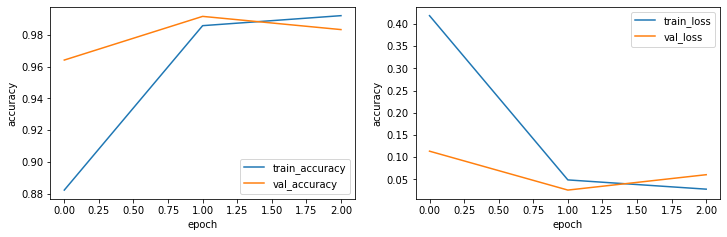

272/272 [==============================] - 49s 182ms/step - loss: 0.0508 - accuracy: 0.9861

Train time:  14818.080889225006
Test accuracy: 0.9860919713973999
Test loss: 0.05077052861452103
Test time:  49.66576409339905


In [ ]:
model = Sequential()

model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

model.add(Flatten())

model.add(Dense(512, activation='sigmoid'))

model.add(Dense(29, activation='softmax'))

results(model)

In [ ]:
classes = 29
batch = 256
epochs = 25
learning_rate = 0.001

Epoch 1/25
276/276 [==============================] - 10s 37ms/step - loss: 3.0785 - accuracy: 0.1599 - val_loss: 2.5448 - val_accuracy: 0.2365
Epoch 2/25
276/276 [==============================] - 10s 36ms/step - loss: 2.2115 - accuracy: 0.3379 - val_loss: 2.0346 - val_accuracy: 0.3672
Epoch 3/25
276/276 [==============================] - 11s 40ms/step - loss: 1.7872 - accuracy: 0.4514 - val_loss: 1.6614 - val_accuracy: 0.4894
Epoch 4/25
276/276 [==============================] - 11s 41ms/step - loss: 1.5210 - accuracy: 0.5295 - val_loss: 1.5273 - val_accuracy: 0.5342
Epoch 5/25
276/276 [==============================] - 11s 40ms/step - loss: 1.3207 - accuracy: 0.5953 - val_loss: 1.2948 - val_accuracy: 0.5876
Epoch 6/25
276/276 [==============================] - 11s 39ms/step - loss: 1.1507 - accuracy: 0.6502 - val_loss: 1.1570 - val_accuracy: 0.6373
Epoch 7/25
276/276 [==============================] - 11s 39ms/step - loss: 1.0437 - accuracy: 0.6827 - val_loss: 0.9846 - val_accuracy:

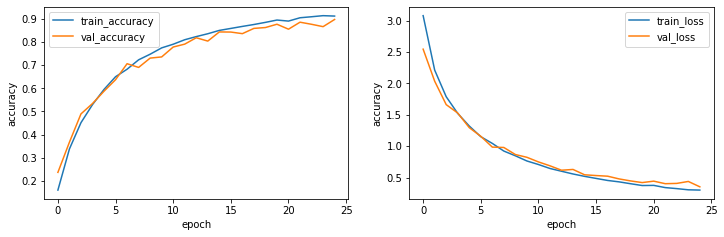

272/272 [==============================] - 1s 5ms/step - loss: 0.3355 - accuracy: 0.8977

Train time:  272.1494872570038
Test accuracy: 0.8977011442184448
Test loss: 0.33546414971351624
Test time:  1.275989055633545


In [ ]:

model2 = Sequential()

model2.add(Flatten(input_shape=(32, 32, 3)))

model2.add(Dense(1024, activation='tanh'))

model2.add(Dense(classes, activation='softmax'))

classes = 29
batch = 256
epochs = 25
learning_rate = 0.001
results(model2)

In [ ]:
classes = 29
batch = 64
epochs = 5
learning_rate = 0.001
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


Epoch 1/5
1102/1102 [==============================] - 309s 280ms/step - loss: 0.5745 - accuracy: 0.8272 - val_loss: 1.6313 - val_accuracy: 0.6167
Epoch 2/5
1102/1102 [==============================] - 307s 279ms/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 0.3325 - val_accuracy: 0.8870
Epoch 3/5
1102/1102 [==============================] - 307s 278ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0618 - val_accuracy: 0.9782
Epoch 4/5
1102/1102 [==============================] - 307s 279ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.2832 - val_accuracy: 0.9078
Epoch 5/5
1102/1102 [==============================] - 309s 280ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.1532 - val_accuracy: 0.9465
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_____________________________________________

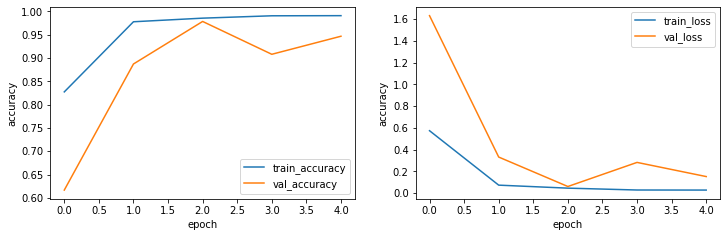

272/272 [==============================] - 10s 37ms/step - loss: 0.1500 - accuracy: 0.9507

Train time:  1540.6289854049683
Test accuracy: 0.9506896734237671
Test loss: 0.15004998445510864
Test time:  10.042662858963013


In [ ]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='sigmoid'))
model3.add(Dense(classes, activation='softmax'))

results(model3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=4, strides=1, activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=4, strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(29, activation='softmax'))


Epoch 1/5
551/551 [==============================] - 185s 336ms/step - loss: 3.1939 - accuracy: 0.0875 - val_loss: 2.5513 - val_accuracy: 0.2404
Epoch 2/5
551/551 [==============================] - 171s 309ms/step - loss: 2.2497 - accuracy: 0.3042 - val_loss: 1.6052 - val_accuracy: 0.4996
Epoch 3/5
551/551 [==============================] - 198s 359ms/step - loss: 1.7187 - accuracy: 0.4408 - val_loss: 1.1927 - val_accuracy: 0.6263
Epoch 4/5
551/551 [==============================] - 178s 323ms/step - loss: 1.4221 - accuracy: 0.5267 - val_loss: 0.9211 - val_accuracy: 0.7057
Epoch 5/5
551/551 [==============================] - 181s 329ms/step - loss: 1.2018 - accuracy: 0.5923 - val_loss: 0.7698 - val_accuracy: 0.7501
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_174 (Conv2D)          (None, 29, 29, 32)        1568      
______________________________________________________

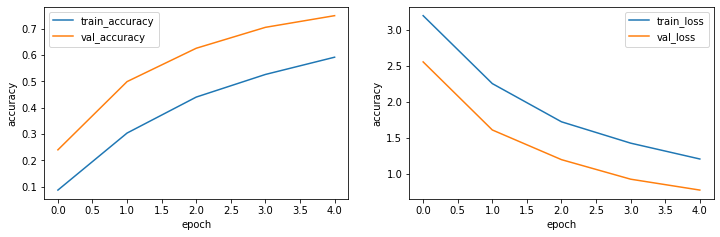

272/272 [==============================] - 3s 13ms/step - loss: 0.7444 - accuracy: 0.7675

Train time:  915.4569976329803
Test accuracy: 0.7674712538719177
Test loss: 0.7444190382957458
Test time:  3.5532186031341553


In [ ]:
classes = 29
batch = 128
epochs = 5
learning_rate = 0.0001
results(model)